- **제출자: AI26_오준서**  
- **제출일: 2025-06-16**  
- **PBL04 : 계열 매출 데이터를 활용한 월별 매출 분석 (Pandas와 Matplotlib을 활용한 연간 매출 추리 시각화)**
    - **1. SalesAnalysis 클래스 정의**
    - **2. 2024년 1월~12월 까지 의 날짜 생성**
    - **3. 일별 매출(1000~10000)을 난수로 생성하여 저장**
    - **4. 월별 매출 총합 계산 후 시각화**
    
- **해결 가이드**
    - __init__() 에서 pd.date._range로 날짜 생성, 매출 데이터 생성
    - 월별 집계 : groupby 활용
    - 시각화 : plt.plot() + 한글 폰트 설정

- 월별 매출 집계

- 전월 대비 증감률 계산 및 시각화

- 최고/최저 매출 강조 (x 마커)

- 평균선 표시 (기준선)

- 3개월 이동 평균선 표시 (추세선)

- 성장률 수치 표시 (각 점 위에 텍스트)

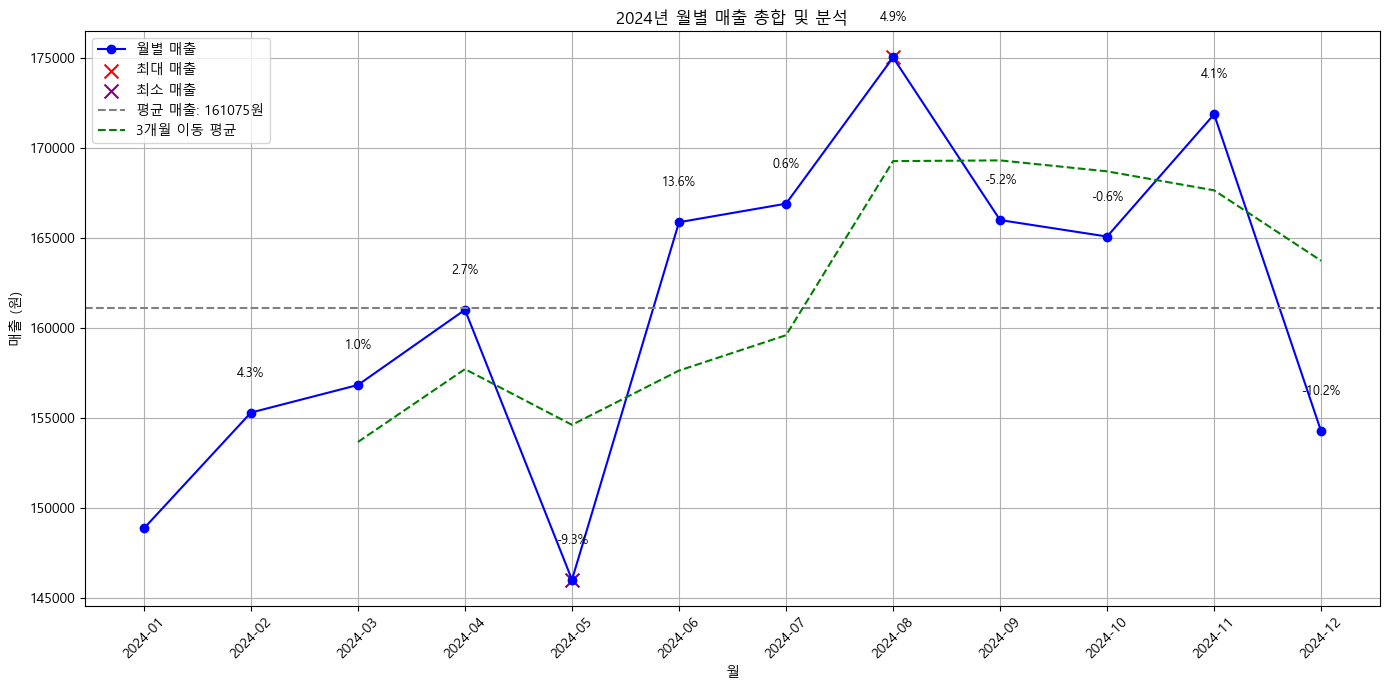

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams

class SalesAnalysis:
    def __init__(self):
        """
        생성자에서 날짜 생성 및 매출 데이터 생성
        """
        # 2024년 1월 1일부터 12월 31일까지의 날짜 생성
        self.dates = pd.date_range(start="2024-01-01", end="2024-12-31", freq='D')
        self.sales_data = pd.DataFrame({
            'Date': self.dates,
            'Revenue': np.random.randint(1000, 10001, size=len(self.dates))
        })

    def analyze_monthly_sales(self):
        """
        월별 매출 총합 및 통계 지표 계산
        """
        # 'Month' 컬럼 추가
        self.sales_data['Month'] = self.sales_data['Date'].dt.to_period('M')

        # 월별 매출 총합 계산
        self.monthly_sales = self.sales_data.groupby('Month')['Revenue'].sum().reset_index()
        self.monthly_sales['Month'] = self.monthly_sales['Month'].astype(str)

        # 전월 대비 증감률 계산
        self.monthly_sales['GrowthRate'] = self.monthly_sales['Revenue'].pct_change() * 100

        # 3개월 이동 평균선 추가
        self.monthly_sales['MovingAvg'] = self.monthly_sales['Revenue'].rolling(window=3).mean()

        # 평균 매출 계산
        self.average_revenue = self.monthly_sales['Revenue'].mean()

        # 최대, 최소 매출 인덱스
        self.max_idx = self.monthly_sales['Revenue'].idxmax()
        self.min_idx = self.monthly_sales['Revenue'].idxmin()

    def plot_monthly_sales(self):
        """
        시각화: 꺾은선 그래프 + 성장률 + 이동 평균선 + 평균선 + 최고/최저 강조
        """
        # 한글 폰트 설정 (윈도우)
        rcParams['font.family'] = 'Malgun Gothic'

        plt.figure(figsize=(14, 7))
        
        # 기본 꺾은선 그래프
        plt.plot(self.monthly_sales['Month'], self.monthly_sales['Revenue'], 
                 marker='o', linestyle='-', color='blue', label='월별 매출')

        # 최대 매출 (빨간 점)
        plt.scatter(self.monthly_sales.loc[self.max_idx, 'Month'], 
                    self.monthly_sales.loc[self.max_idx, 'Revenue'],
                    color='red', label='최대 매출', marker='x', s=100)
        
        # 최소 매출 (보라색 점)
        plt.scatter(self.monthly_sales.loc[self.min_idx, 'Month'], 
                    self.monthly_sales.loc[self.min_idx, 'Revenue'],
                    color='purple', label='최소 매출', marker='x', s=100)

        # 평균선 추가
        plt.axhline(self.average_revenue, color='gray', linestyle='--', 
                    label=f'평균 매출: {self.average_revenue:.0f}원')

        # 이동 평균선 추가
        plt.plot(self.monthly_sales['Month'], self.monthly_sales['MovingAvg'], 
                 linestyle='--', color='green', label='3개월 이동 평균')

        # 증감률 텍스트 표시
        for i in range(1, len(self.monthly_sales)):
            rate = self.monthly_sales.loc[i, 'GrowthRate']
            plt.text(self.monthly_sales['Month'][i], 
                     self.monthly_sales['Revenue'][i] + 2000, 
                     f'{rate:.1f}%', 
                     ha='center', fontsize=9, color='black')

        # 그래프 기본 설정
        plt.title('2024년 월별 매출 총합 및 분석')
        plt.xlabel('월')
        plt.ylabel('매출 (원)')
        plt.xticks(rotation=45)
        plt.grid(True)
        plt.legend()
        plt.tight_layout()
        plt.show()

# 실행 예시
if __name__ == "__main__":
    analysis = SalesAnalysis()
    analysis.analyze_monthly_sales()
    analysis.plot_monthly_sales()
